In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [64]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

print(y)

[4.53978687e-05 5.01721647e-05 5.54485247e-05 6.12797396e-05
 6.77241496e-05 7.48462275e-05 8.27172229e-05 9.14158739e-05
 1.01029194e-04 1.11653341e-04 1.23394576e-04 1.36370327e-04
 1.50710358e-04 1.66558065e-04 1.84071905e-04 2.03426978e-04
 2.24816770e-04 2.48455082e-04 2.74578156e-04 3.03447030e-04
 3.35350130e-04 3.70606141e-04 4.09567165e-04 4.52622223e-04
 5.00201107e-04 5.52778637e-04 6.10879359e-04 6.75082731e-04
 7.46028834e-04 8.24424686e-04 9.11051194e-04 1.00677082e-03
 1.11253603e-03 1.22939862e-03 1.35851995e-03 1.50118226e-03
 1.65880108e-03 1.83293894e-03 2.02532039e-03 2.23784852e-03
 2.47262316e-03 2.73196076e-03 3.01841632e-03 3.33480731e-03
 3.68423990e-03 4.07013772e-03 4.49627316e-03 4.96680165e-03
 5.48629890e-03 6.05980149e-03 6.69285092e-03 7.39154134e-03
 8.16257115e-03 9.01329865e-03 9.95180187e-03 1.09869426e-02
 1.21284350e-02 1.33869178e-02 1.47740317e-02 1.63024994e-02
 1.79862100e-02 1.98403057e-02 2.18812709e-02 2.41270214e-02
 2.65969936e-02 2.931223

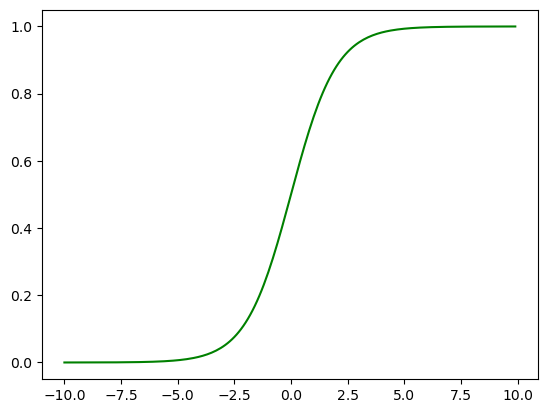

In [65]:
plt.plot(x, y, 'g')

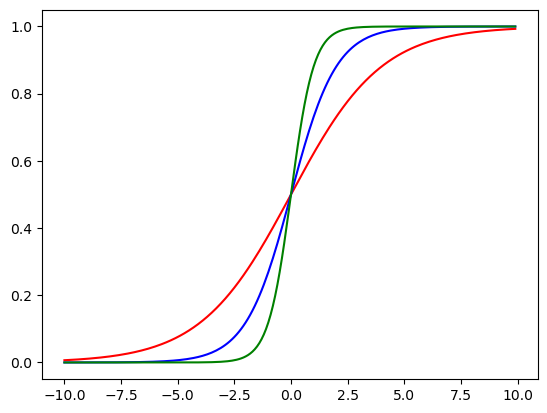

In [66]:
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'g')

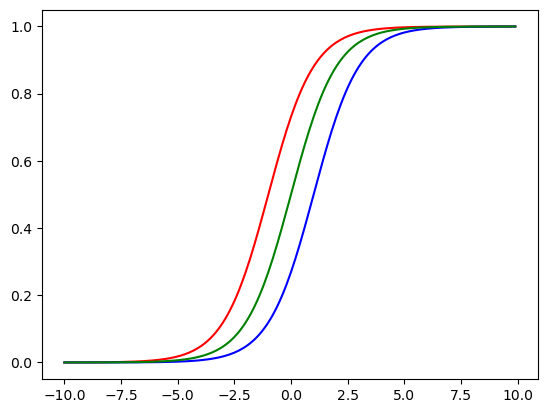

In [67]:
y1 = sigmoid(x + 1)
y2 = sigmoid(x - 1)
y3 = sigmoid(x)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'g')

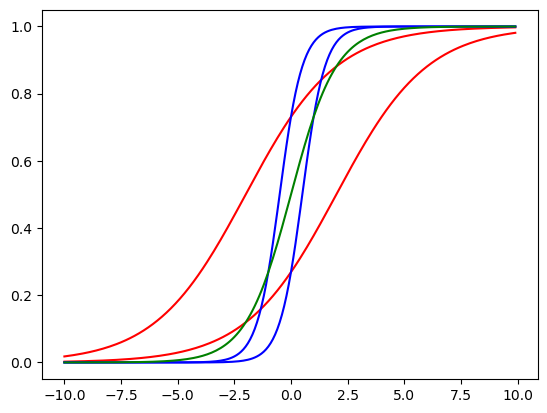

In [68]:
y1 = sigmoid(0.5 * x + 1)
y2 = sigmoid(0.5 * x - 1)
y3 = sigmoid(2 * x + 1)
y4 = sigmoid(2 * x - 1)
y5 = sigmoid(x)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'b')
plt.plot(x, y4, 'b')
plt.plot(x, y5, 'g')

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

torch.manual_seed(0)

In [70]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data) 
y_train = torch.FloatTensor(y_data)

print(x_train.shape) 
print(y_train.shape)

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1 
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)   # 선형회귀에 비해서 러닝 레이트가 훨씬 큼
epochs = 10000
costs = []

torch.Size([6, 2])
torch.Size([6, 1])


In [71]:
for epoch in range(epochs + 1):
    hx = torch.sigmoid(x_train.matmul(W) + b)
    # cost = -(y_train * torch.log(hx) + (1 - y_train) * torch.log(1 - hx)).mean()
    cost = F.binary_cross_entropy(hx, y_train)  # 위의 수식을 구현한 메소드임
    costs.append(cost.item())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, cost.item()))

Epoch    0/10000 Cost: 0.693147
Epoch  100/10000 Cost: 0.414327
Epoch  200/10000 Cost: 0.349521
Epoch  300/10000 Cost: 0.301302
Epoch  400/10000 Cost: 0.263532
Epoch  500/10000 Cost: 0.233518
Epoch  600/10000 Cost: 0.209313
Epoch  700/10000 Cost: 0.189496
Epoch  800/10000 Cost: 0.173035
Epoch  900/10000 Cost: 0.159179
Epoch 1000/10000 Cost: 0.147375
Epoch 1100/10000 Cost: 0.137207
Epoch 1200/10000 Cost: 0.128365
Epoch 1300/10000 Cost: 0.120608
Epoch 1400/10000 Cost: 0.113750
Epoch 1500/10000 Cost: 0.107644
Epoch 1600/10000 Cost: 0.102172
Epoch 1700/10000 Cost: 0.097242
Epoch 1800/10000 Cost: 0.092776
Epoch 1900/10000 Cost: 0.088711
Epoch 2000/10000 Cost: 0.084996
Epoch 2100/10000 Cost: 0.081587
Epoch 2200/10000 Cost: 0.078447
Epoch 2300/10000 Cost: 0.075546
Epoch 2400/10000 Cost: 0.072857
Epoch 2500/10000 Cost: 0.070357
Epoch 2600/10000 Cost: 0.068027
Epoch 2700/10000 Cost: 0.065849
Epoch 2800/10000 Cost: 0.063811
Epoch 2900/10000 Cost: 0.061897
Epoch 3000/10000 Cost: 0.060097
Epoch 31

In [74]:
def pred(x):
    hx = torch.sigmoid(x.matmul(W) + b)
    result = []
    for i in range(len(hx)):
        if hx[i] >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return hx, result

In [75]:
hx, result = pred(x_train)
print(hx.flatten().data.numpy())
print(result)

[2.8586222e-04 3.2014031e-02 3.9513092e-02 9.5566678e-01 9.9818617e-01
 9.9967766e-01]
[0, 0, 0, 1, 1, 1]
